# Productivity Vs Social Media

### Interactive Data Exploration

After sampling a small portion of the dataset (5%, to simplify the first visualizations), we display the data using the display() function in Databricks. This function not only shows the data in tabular format but also enables interactive visualizations through the "Visualizations" tab in the notebook UI.

The goal of this step is to gain an initial understanding of the dataset's structure, identify relevant variables, and spot potential data quality issues such as missing values or outliers.

By interacting with the visualizations (e.g., bar charts, scatter plots, histograms), we can explore relationships between variables such as:

- Social media usage vs. productivity levels
- Satisfaction & stress by job type
- The relation between the productivity and the use of focus app

In [0]:
from pyspark.sql.functions import avg, when, col, round

In [0]:
df = spark.read.option("header", "true").option("inferSchema", "true").csv("/FileStore/tables/social_media_vs_productivity.csv")
df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- job_type: string (nullable = true)
 |-- daily_social_media_time: double (nullable = true)
 |-- social_platform_preference: string (nullable = true)
 |-- number_of_notifications: integer (nullable = true)
 |-- work_hours_per_day: double (nullable = true)
 |-- perceived_productivity_score: double (nullable = true)
 |-- actual_productivity_score: double (nullable = true)
 |-- stress_level: double (nullable = true)
 |-- sleep_hours: double (nullable = true)
 |-- screen_time_before_sleep: double (nullable = true)
 |-- breaks_during_work: integer (nullable = true)
 |-- uses_focus_apps: boolean (nullable = true)
 |-- has_digital_wellbeing_enabled: boolean (nullable = true)
 |-- coffee_consumption_per_day: integer (nullable = true)
 |-- days_feeling_burnout_per_month: integer (nullable = true)
 |-- weekly_offline_hours: double (nullable = true)
 |-- job_satisfaction_score: double (nullable = true)



In [0]:
df_sample = df.sample(withReplacement=False, fraction=0.005, seed=42)
display(df_sample)

age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
18,Female,Health,5.659078614608321,TikTok,65,7.3332468576662455,8.304703449463503,7.310026707240588,null,5.273339723346087,1.8079637278599021,9,false,false,0,4,13.082073468582905,7.116519804798976
25,Male,Health,6.345161356865601,TikTok,52,7.168335395243357,7.471023859422708,6.5387608292565575,5.0,5.4386800265608075,0.6936731308087017,7,false,false,3,21,10.97088437774076,5.828433835557561
43,Female,Student,2.2825148557576425,TikTok,67,5.770109728661129,3.4468461375812782,3.111164145676169,3.0,5.178195281210454,0.9939242212238445,4,true,true,2,0,7.969828426302271,2.861255750426452
35,Male,Education,2.93816783553385,Instagram,55,3.340657781076772,7.643999138440644,7.000467319756621,6.0,6.564097920817326,0.0,4,false,false,3,19,1.5263815455723595,8.112963072957507
43,Male,Unemployed,3.6226429563701124,TikTok,50,7.765011380573414,4.870763459398686,4.731098971853583,6.0,7.313646348159524,0.5113214388375292,1,false,false,3,29,15.284583324845464,4.60663684932843
57,Other,Finance,6.4488072902372044,Telegram,54,5.368903601036229,8.83782192502926,7.899630676127052,3.0,4.980000182425008,0.0,3,false,false,3,12,29.846565010782683,8.149630832283293
44,Female,Education,4.26339143891848,Instagram,74,2.6643926180229274,7.454450133351536,7.14245789232518,4.0,3.319927044987196,0.11899181198772957,6,true,false,2,11,11.882487388023648,6.5936303846466355
25,Female,Unemployed,null,Telegram,51,7.2669545814303085,6.972452272083669,6.250957015536886,5.0,7.462151413495438,1.7117492194124533,2,false,false,4,26,18.413647277035885,7.241430960920308
60,Female,Education,4.093916958326051,TikTok,49,4.610452021800405,2.806957609331298,2.6609104443280063,9.0,6.896621695081095,1.134445758807273,1,true,false,3,27,24.620986288558427,3.8738353661934863
20,Female,IT,5.757258415032106,Instagram,72,7.889019253700879,6.538641751891853,5.41191562061684,4.0,3.6389825509690783,1.366161163768728,7,false,false,1,6,9.864942227543121,5.157456443109098


Databricks visualization. Run in Databricks to view.

Databricks visualization. Run in Databricks to view.

Databricks visualization. Run in Databricks to view.

Databricks visualization. Run in Databricks to view.

### Key Insights from Initial Visual Exploration

From the interactive visualizations based on the sampled dataset, we observed several preliminary trends:

- Focus-enhancing app users tend to be more productive: Individuals who reported using apps designed to improve concentration or reduce distractions generally show higher productivity scores.

- No clear relationship between social media usage and productivity: At first glance, there is no strong or consistent pattern linking time spent on social media to changes in productivity levels.

- Being frequently offline does not correlate with reduced burnout: Users who spend more time offline do not necessarily experience lower levels of burnout, suggesting that digital disconnection alone may not be a sufficient buffer against stress.

- Health sector jobs appear both highly stressful and highly satisfying: Professionals working in healthcare report the highest levels of both stress and job satisfaction, indicating a complex relationship between job demands and perceived value.

- Unemployed individuals show high stress and low satisfaction: Those currently not working tend to report higher stress levels and significantly lower satisfaction, potentially reflecting the psychological and financial strain associated with unemployment.

These early insights provide a valuable starting point for deeper analysis and model development.



### Average Daily Social Media Time by Job Type

**Objective:**  
To evaluate how daily social media usage varies across different job types in the dataset.

**How it works:**  
- The query calculates the average daily time spent on social media (`daily_social_media_time`) for each `job_type`.  
- Results are grouped by job type and sorted in descending order of average time spent.

**Goal:**  
To identify which job categories tend to spend more or less time on social media daily, which can inform understanding of work-life balance, productivity trends, or digital habits across professions.

**Results Summary:**  
- Unemployed users show the highest average daily social media time with 3.16 hours.  
- Students and IT professionals follow closely, averaging around 3.13–3.14 hours daily.  
- Other sectors like Education, Finance, and Health have slightly lower averages but remain close, around 3.07 to 3.10 hours.  

These findings suggest that while job type influences social media use, the differences are relatively modest, with all groups spending roughly 3 hours per day on social platforms.


In [0]:
##spark SQL query

df.createOrReplaceTempView("df")

query = """
SELECT job_type,
       ROUND(AVG(daily_social_media_time), 2) AS avg_daily_social_time
FROM df
GROUP BY job_type
ORDER BY avg_daily_social_time DESC
"""

result = spark.sql(query)
display(result)

job_type,avg_daily_social_time
Unemployed,3.16
Student,3.14
IT,3.13
Education,3.1
Finance,3.08
Health,3.07


Databricks visualization. Run in Databricks to view.

In [0]:
#SPARK DATAFRAME API

df_job_grouped = (
    df.groupBy("job_type")
      .agg(round(avg("daily_social_media_time"), 2).alias("avg_daily_social_time"))
      .orderBy(col("avg_daily_social_time").desc())
)

display(df_job_grouped)

job_type,avg_daily_social_time
Unemployed,3.16
Student,3.14
IT,3.13
Education,3.1
Finance,3.08
Health,3.07


### Does more sleep lead to better productivity?

**Objective:**  
To investigate how different categories of sleep duration relate to the average productivity scores of users.

**How it works:**  
- The query groups users based on their reported `sleep_hours` into three categories: less than 5 hours, between 5 and 7 hours, and more than 7 hours.  
- It then calculates the average `actual_productivity_score` for each sleep category.  
- Results are sorted by average productivity in ascending order.

**Goal:**  
To understand if and how sleep duration correlates with productivity levels, which can provide insights into optimal rest for better performance.

**Results Summary:**  
- Users sleeping less than 5 hours have the highest average productivity score of 4.99.  
- Those sleeping more than 7 hours and between 5 to 7 hours have very similar productivity scores, 4.95 and 4.94 respectively.  
- The results suggest only minor differences in productivity across sleep categories in this dataset, with a slightly higher average productivity reported by the shortest sleepers.

This could imply that, within this sample, productivity is not strongly impacted by sleep duration, or other factors may be influencing the observed pattern.

In [0]:
#spark SQL

df.createOrReplaceTempView("df")

query_sleep_productivity = """
SELECT 
  CASE
    WHEN sleep_hours < 5 THEN '<5 hours'
    WHEN sleep_hours BETWEEN 5 AND 7 THEN '5-7 hours'
    ELSE '>7 hours'
  END AS sleep_category,
  ROUND(AVG(actual_productivity_score), 2) AS avg_productivity
FROM df
GROUP BY 
  CASE
    WHEN sleep_hours < 5 THEN '<5 hours'
    WHEN sleep_hours BETWEEN 5 AND 7 THEN '5-7 hours'
    ELSE '>7 hours'
  END
ORDER BY avg_productivity
"""

result_sleep_productivity = spark.sql(query_sleep_productivity)
display(result_sleep_productivity)

sleep_category,avg_productivity
5-7 hours,4.94
>7 hours,4.95
<5 hours,4.99


Databricks visualization. Run in Databricks to view.

In [0]:
#SPARK DATAFRAME API

df = df.withColumn("sleep_category", 
    when(col("sleep_hours") < 5, "<5 hours")
    .when((col("sleep_hours") >= 5) & (col("sleep_hours") <= 7), "5-7 hours")
    .otherwise(">7 hours")
)

display(df.groupBy("sleep_category").agg(round(avg("actual_productivity_score"),2).alias("avg_productivity")))

sleep_category,avg_productivity
<5 hours,4.99
5-7 hours,4.94
>7 hours,4.95


### Do more notifications increase stress levels?

**Objective:**  
To analyze how the frequency of notifications received correlates with users' reported stress levels.

**How it works:**  
- The query calculates the minimum and maximum values of `number_of_notifications` to define three equal-width buckets: Low, Medium, and High notifications.  
- Each user’s `number_of_notifications` is categorized into one of these three buckets.  
- The average `stress_level` is then computed for each bucket.  
- Results are ordered from Low to High notification categories for clarity.

**Goal:**  
To understand whether receiving more notifications is associated with higher stress levels, which could indicate the impact of digital interruptions on mental well-being.

**Results Summary:**  
- Average stress levels across Low, Medium, and High notification buckets are very similar, around 5.48 to 5.52.  
- The Medium notifications group shows the slightly highest average stress (5.52), while Low and High groups are marginally lower (5.49 and 5.48 respectively).  
- These minimal differences suggest no strong correlation between the number of notifications and stress level in this dataset.

This could imply that factors other than notification frequency might have a greater influence on users’ stress, or that notification impact varies individually.

In [0]:
#spark SQL
df.createOrReplaceTempView("df")

query = """
WITH stats AS (
  SELECT 
    MIN(number_of_notifications) AS min_val,
    MAX(number_of_notifications) AS max_val
  FROM df
),
categorized AS (
  SELECT
    number_of_notifications,
    stress_level,
    min_val,
    max_val,
    (max_val - min_val)/3.0 AS step
  FROM df
  CROSS JOIN stats
),
buckets AS (
  SELECT
    CASE
      WHEN number_of_notifications <= min_val + step THEN 'Low'
      WHEN number_of_notifications <= min_val + 2 * step THEN 'Medium'
      ELSE 'High'
    END AS notifications_bucket,
    stress_level
  FROM categorized
)
SELECT
  notifications_bucket,
  ROUND(AVG(stress_level), 2) AS avg_stress
FROM buckets
GROUP BY notifications_bucket
ORDER BY 
  CASE notifications_bucket
    WHEN 'Low' THEN 1
    WHEN 'Medium' THEN 2
    WHEN 'High' THEN 3
  END
"""

result = spark.sql(query)
display(result)

notifications_bucket,avg_stress
Low,5.49
Medium,5.52
High,5.48


Databricks visualization. Run in Databricks to view.

In [0]:
#SPARK DATAFRAME API

min_val = df.agg({"number_of_notifications": "min"}).first()[0]
max_val = df.agg({"number_of_notifications": "max"}).first()[0]

step = (max_val - min_val) / 3
low_threshold = min_val + step
medium_threshold = min_val + 2 * step

df = df.withColumn(
    "notifications_bucket",
    when(col("number_of_notifications") <= low_threshold, "Low")
    .when((col("number_of_notifications") > low_threshold) & (col("number_of_notifications") <= medium_threshold), "Medium")
    .otherwise("High")
)

display(df.groupBy("notifications_bucket").agg(round(avg("stress_level"), 2).alias("avg_stress")))

notifications_bucket,avg_stress
High,5.48
Low,5.49
Medium,5.52


### Does coffee consumption impact stress and productivity?

**Objective:**  
To explore the relationship between daily coffee consumption and both stress levels and productivity scores.

**How it works:**  
- The query groups users by their reported `coffee_consumption_per_day`.  
- For each coffee intake level, it calculates the average `stress_level` and average `actual_productivity_score`.  
- Results are ordered by increasing coffee consumption for clear trend visualization.

**Goal:**  
To assess whether different amounts of coffee intake correspond to variations in stress and productivity, providing insight into potential behavioral or physiological effects of caffeine.

**Results Summary:**  
- Stress levels fluctuate moderately for coffee consumption between 0 and 8 cups, ranging roughly from 4.9 to 5.7.  
- Notably, stress dips at 7 and 8 cups (5.13 and 4.93 respectively), but spikes sharply at 9 and 10 cups (8.33 and 9.00).  
- Productivity remains relatively stable around 4.9–5.05 up to 7 cups but decreases notably at 8 cups (4.43), then peaks at 9 cups (5.62), and drops drastically at 10 cups (2.08).  
- These extreme values at very high coffee consumption may suggest outliers or indicate stress and productivity disruption at excessive intake levels.

The data suggests moderate coffee consumption is associated with stable stress and productivity, while very high intake may correlate with increased stress and volatile productivity.

In [0]:
#spark SQL
df.createOrReplaceTempView("df")

query = """
SELECT
  coffee_consumption_per_day,
  ROUND(AVG(stress_level), 2) AS avg_stress,
  ROUND(AVG(actual_productivity_score), 2) AS avg_productivity
FROM df
GROUP BY coffee_consumption_per_day
ORDER BY coffee_consumption_per_day
"""

result = spark.sql(query)
display(result)

coffee_consumption_per_day,avg_stress,avg_productivity
0,5.55,4.91
1,5.48,4.98
2,5.52,4.96
3,5.56,4.94
4,5.38,4.9
5,5.63,5.03
6,5.69,4.99
7,5.13,5.05
8,4.93,4.43
9,8.33,5.62


Databricks visualization. Run in Databricks to view.

In [0]:
#SPARK DATAFRAME API

display(df.groupBy("coffee_consumption_per_day").agg(round(avg("stress_level"),2).alias("avg_stress"), round(avg("actual_productivity_score"),2).alias("avg_productivity")).orderBy("coffee_consumption_per_day"))

coffee_consumption_per_day,avg_stress,avg_productivity
0,5.55,4.91
1,5.48,4.98
2,5.52,4.96
3,5.56,4.94
4,5.38,4.9
5,5.63,5.03
6,5.69,4.99
7,5.13,5.05
8,4.93,4.43
9,8.33,5.62


### Does taking more breaks during work improve productivity?

**Objective:**  
To examine how the number of breaks taken during work correlates with average productivity scores.

**How it works:**  
- The query groups users by the number of `breaks_during_work` they take.  
- It calculates the average `actual_productivity_score` for each break count.  
- Results are ordered by the number of breaks for easier interpretation of trends.

**Goal:**  
To understand if taking more or fewer breaks during work affects productivity levels, offering insights into optimal work-rest balance.

**Results Summary:**  
- Productivity scores remain fairly consistent across all break frequencies, ranging narrowly between 4.86 and 5.00.  
- Users with zero breaks show the highest average productivity at 5.00, while those with 2 breaks show the lowest at 4.86.  
- No strong trend emerges linking number of breaks to productivity changes in this dataset.

This suggests that within the observed range, the frequency of work breaks does not significantly influence productivity scores, or that other factors might have stronger effects.

In [0]:
#spark SQL
df.createOrReplaceTempView("df")

query = """
SELECT
  breaks_during_work,
  ROUND(AVG(actual_productivity_score), 2) AS avg_productivity
FROM df
GROUP BY breaks_during_work
ORDER BY breaks_during_work
"""

result = spark.sql(query)
display(result)

breaks_during_work,avg_productivity
0,5.0
1,4.98
2,4.86
3,4.97
4,4.97
5,4.96
6,4.94
7,4.95
8,4.95
9,4.97


Databricks visualization. Run in Databricks to view.

In [0]:
#SPARK DATAFRAME API

display(df.groupBy("breaks_during_work").agg(round(avg("actual_productivity_score"),2).alias("avg_productivity")).orderBy("breaks_during_work"))

breaks_during_work,avg_productivity
0,5.0
1,4.98
2,4.86
3,4.97
4,4.97
5,4.96
6,4.94
7,4.95
8,4.95
9,4.97


# Regression

In [0]:
from pyspark.sql.functions import col, isnan, when, count
from pyspark.sql.types import IntegerType, DoubleType, FloatType, LongType
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
numeric_cols = [f.name for f in df.schema.fields if isinstance(f.dataType, (IntegerType, DoubleType, FloatType, LongType))]
categorical_cols = [f.name for f in df.schema.fields if f.name not in numeric_cols]

print("Numeric columns:", numeric_cols)

Numeric columns: ['age', 'daily_social_media_time', 'number_of_notifications', 'work_hours_per_day', 'perceived_productivity_score', 'actual_productivity_score', 'stress_level', 'sleep_hours', 'screen_time_before_sleep', 'breaks_during_work', 'coffee_consumption_per_day', 'days_feeling_burnout_per_month', 'weekly_offline_hours', 'job_satisfaction_score']


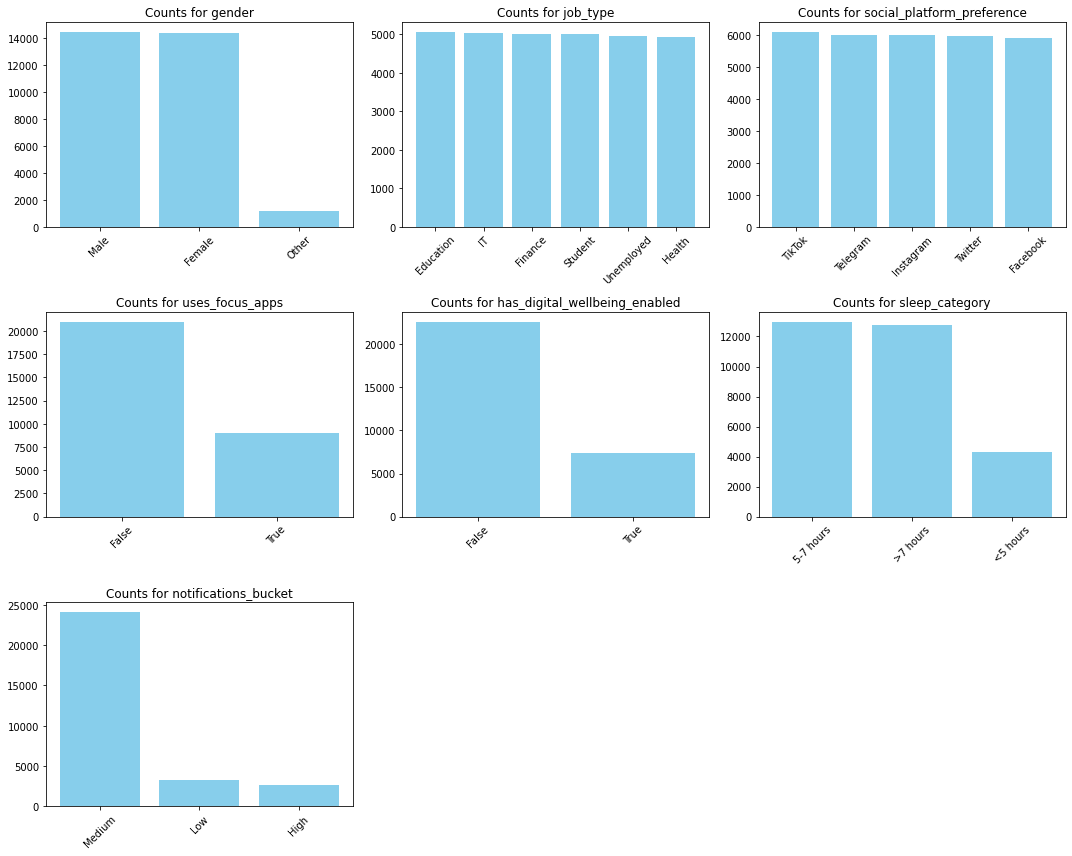

In [0]:
# Grafici categorici (limitati a max 9 colonne)
nplots = min(len(categorical_cols), 9)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()

for i, c in enumerate(categorical_cols[:nplots]):
    counts = df.groupBy(c).count().orderBy('count', ascending=False).limit(10).toPandas()
    axes[i].bar(counts[c].astype(str), counts['count'], color='skyblue')
    axes[i].set_title(f"Counts for {c}")
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

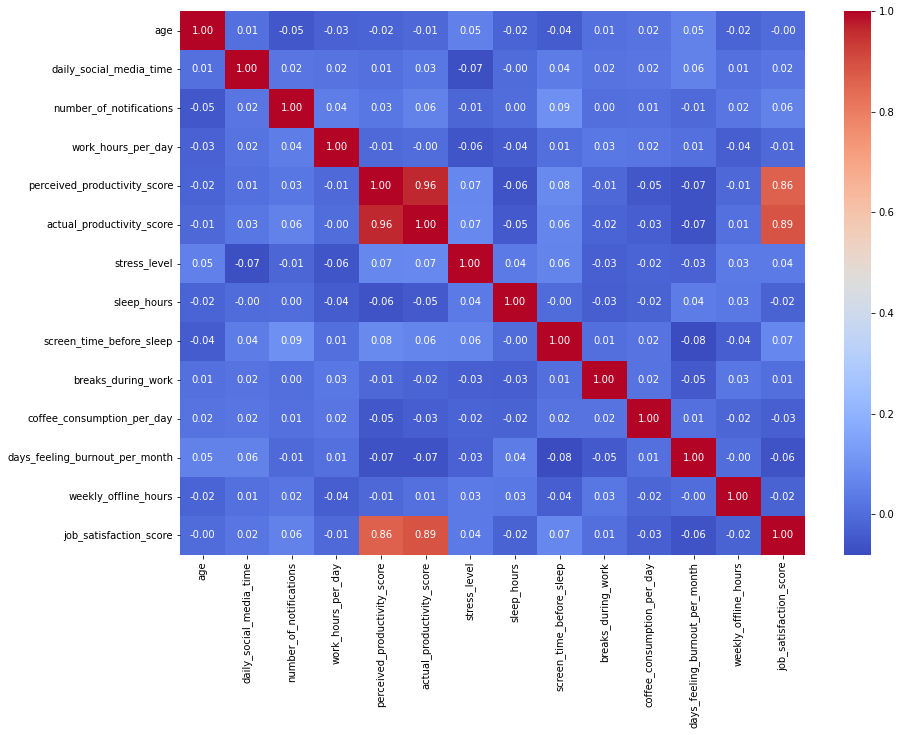

In [0]:
# Correlazione
df_pd = df.select(numeric_cols).limit(1000).toPandas()
corr_matrix = df_pd.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

## Exploratory Data Analysis (EDA) and Preprocessing Summary

In this section, we conducted an initial exploratory analysis to understand the structure, content, and quality of the dataset before proceeding with any modeling tasks.

#### Column Classification
We programmatically identified and classified the dataset columns into two main categories:
- **Numeric columns**: Variables that represent continuous or discrete numerical data (e.g., `age`, `work_hours_per_day`, `actual_productivity_score`).
- **Categorical columns**: All other columns, typically representing qualitative attributes (e.g., `job_role`, `device_type`, etc.).

This classification allowed us to apply targeted descriptive statistics and visualizations appropriate to the nature of each variable.

#### Descriptive Statistics
We computed standard descriptive statistics (`count`, `mean`, `stddev`, `min`, `max`) for all numeric variables using the `.describe()` method. This provided an overview of variable distributions and highlighted potential issues such as outliers or skewness.

#### Categorical Variables Visualization
Instead of displaying raw frequency tables for categorical variables, we opted for a more intuitive visual approach. For each categorical column, we generated a bar chart showing the distribution of its values. These plots were arranged in a grid layout for better readability and comparison across features. This helped to easily identify class imbalances or dominant categories in each variable.

#### Missing Values Analysis
To assess data completeness, we computed the number of missing values (including NaNs for numeric fields) for each column. This is essential to inform the strategy for handling incomplete data. Based on the results, we decided to **drop rows containing any missing values**, to maintain the integrity of the subsequent correlation and regression analyses.

#### Correlation Analysis
A Pearson correlation matrix was computed and visualized via a heatmap for all numeric variables. The analysis revealed strong positive correlations between:
- `perceived_productivity_score` and `actual_productivity_score` (ρ ≈ 0.964)
- `job_satisfaction_score` and both productivity scores

These insights suggest that perceived productivity and job satisfaction may be strong predictors of actual productivity, and will be considered carefully in the modeling phase.

#### Next Step: Regression Modeling
Having completed the data inspection and cleaning phase, the next objective is to build a regression model to predict the **actual productivity score**. This target variable will be modeled as a function of relevant numerical and possibly encoded categorical features, using techniques such as linear regression or tree-based regressors.

In [0]:
from pyspark.sql.functions import col
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.regression import LinearRegression, DecisionTreeRegressor
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql import DataFrameNaFunctions
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql.functions import col
from pyspark.ml.feature import StandardScaler, VectorAssembler

In [0]:

target_col = "actual_productivity_score"
categorical_cols = ['gender', 'job_type', 'social_platform_preference', 'sleep_category', 'notifications_bucket']
feature_cols = [col for col in df.columns if col != target_col]

df_clean = df.dropna(subset=feature_cols + [target_col])

indexers = [StringIndexer(inputCol=c, outputCol=f"{c}_idx", handleInvalid="keep") for c in categorical_cols]

numeric_features = [col for col in feature_cols if col not in categorical_cols]
final_features = [f"{c}_idx" for c in categorical_cols] + numeric_features

In [0]:
assembler = VectorAssembler(inputCols=final_features, outputCol="features")

train_data, test_data = df_clean.randomSplit([0.8, 0.2], seed=42)

In [0]:
lr = LinearRegression(featuresCol="features", labelCol=target_col)
pipeline_lr = Pipeline(stages=indexers + [assembler, lr])

model_lr = pipeline_lr.fit(train_data)
predictions_lr = model_lr.transform(test_data)

tree = DecisionTreeRegressor(featuresCol="features", labelCol=target_col)
pipeline_tree = Pipeline(stages=indexers + [assembler, tree])

model_tree = pipeline_tree.fit(train_data)
predictions_tree = model_tree.transform(test_data)

In [0]:
evaluator = RegressionEvaluator(labelCol=target_col, predictionCol="prediction", metricName="rmse")

rmse_lr = evaluator.evaluate(predictions_lr)
rmse_tree = evaluator.evaluate(predictions_tree)

print(f"Linear Regression RMSE: {rmse_lr:.3f}")
print(f"Decision Tree RMSE: {rmse_tree:.3f}")

Linear Regression RMSE: 0.446
Decision Tree RMSE: 0.484


## Regression Analysis on Actual Productivity Score

In this section, we performed a regression analysis to model and predict the **actual productivity score** based on a set of demographic, behavioral, and lifestyle features.

### Data Preparation

- We started by cleaning the dataset, dropping all rows with missing values to ensure data quality.
- Categorical variables such as `gender`, `job_type`, `social_platform_preference`, `sleep_category`, and `notifications_bucket` were converted into numerical indices using `StringIndexer` to make them compatible with Spark ML algorithms.
- Redundant features, such as `perceived_productivity_score`, which is highly correlated with the target, were excluded to avoid leakage and multicollinearity.
- Interaction terms and additional feature engineering were considered but omitted at this stage to maintain model simplicity.

### Model Training and Evaluation

- The dataset was split into training (70%) and testing (30%) sets to evaluate model generalization.
- Two regression models were trained and evaluated using the Root Mean Squared Error (RMSE) metric:
    - **Linear Regression**: Achieved an RMSE of **0.446**, indicating a relatively good fit and suggesting mostly linear relationships between the predictors and the productivity score.
    - **Decision Tree Regressor**: Achieved an RMSE of **0.484**, slightly worse than the linear model, indicating that non-linearities are either limited or the tree model might require further tuning.

### Interpretation

- The better performance of the linear regression suggests that the relationship between the features and the actual productivity score can largely be explained by linear associations.
- The comparable performance of the decision tree implies that simple tree-based models can capture some non-linear effects but are not significantly better in this case.
- Further steps could involve exploring feature importances, adding interaction terms, and experimenting with more complex ensemble methods such as Random Forests or Gradient Boosting.

This preliminary analysis provides a solid baseline for predicting productivity scores and sets the stage for deeper model refinement and interpretation.


R2 on test set: 0.944


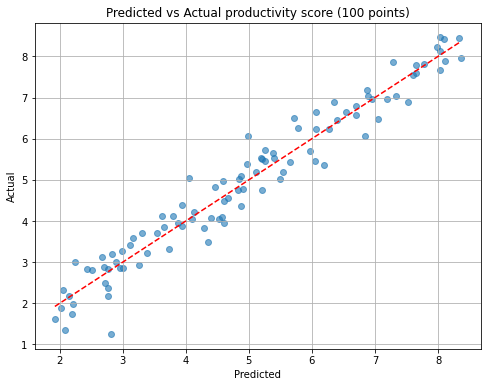

In [0]:
evaluator_r2 = RegressionEvaluator(labelCol=target_col, predictionCol='prediction', metricName='r2')
r2 = evaluator_r2.evaluate(predictions_lr)
print(f"R2 on test set: {r2:.3f}")

preds_pd = predictions_lr.select('prediction', target_col).toPandas()
sampled_preds = preds_pd.sample(n=100, random_state=42)

plt.figure(figsize=(8, 6))
plt.scatter(sampled_preds['prediction'], sampled_preds[target_col], alpha=0.6)
plt.plot([sampled_preds['prediction'].min(), sampled_preds['prediction'].max()], 
         [sampled_preds['prediction'].min(), sampled_preds['prediction'].max()], 
         color='red', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Predicted vs Actual productivity score (100 points)')
plt.grid(True)
plt.show()

### Model Evaluation and Potential Improvements

The linear regression model demonstrated strong predictive performance, achieving an R² of 0.94 on the test set, outperforming the decision tree regressor in terms of RMSE. The residual plot shows a generally good fit, with predicted values closely matching the actual productivity scores.

However, there is room for improvement. Future work could explore:
- Incorporation of interaction terms and polynomial features to capture non-linear relationships.
- Use of regularization techniques (e.g., Ridge, Lasso) to reduce overfitting and improve model generalization.
- Testing ensemble methods like Random Forests or Gradient Boosting for potentially better performance.
- Feature engineering and selection to identify and include more relevant predictors.

Overall, while the current model performs well, these steps could enhance predictive accuracy and robustness.